1. Create a MLP model with 16 hidden layers using "fetch_lfw_people" dataset from SKLearn and report performances using appropriate metrics.

2. Analyse impact of different activation function and solver on the model. Hint: https://scikit-learn.org/stable/modules/grid_search.html

3. Explain your findings and report the best performance.

In [5]:
# Importing the required libraries
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
# Loading the dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70)

In [7]:
# Checking the shape of the dataset
lfw_people.data.shape

(1288, 2914)

In [8]:
# Checking the target names
lfw_people.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [9]:
# Checking the shape of the images
lfw_people.images.shape

(1288, 62, 47)

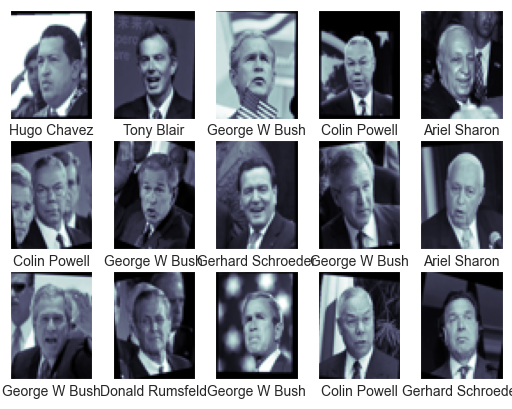

In [10]:
# Plotting the images
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(lfw_people.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=lfw_people.target_names[lfw_people.target[i]])


In [11]:
# preparing the data for training and testing
X = lfw_people.data
y = lfw_people.target

In [12]:
# scale the data by dividing it by 255.0 which is the maximum value of a pixel
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train/255.0
X_test = X_test/255.0

In [17]:
# create an MLP model with 16 hidden layers
mlp = MLPClassifier(hidden_layer_sizes=(100,) * 16, max_iter=500, alpha=1e-4, solver='adam', verbose=10, random_state=42, learning_rate_init=0.1)

In [18]:
# train the model
mlp.fit(X_train, y_train)

Iteration 1, loss = 7.63710356
Iteration 2, loss = 11.59061415
Iteration 3, loss = 13.61531949
Iteration 4, loss = 8.20458705
Iteration 5, loss = 6.59303345
Iteration 6, loss = 4.28907344
Iteration 7, loss = 2.51544380
Iteration 8, loss = 1.92554572
Iteration 9, loss = 1.90609807
Iteration 10, loss = 1.86984151
Iteration 11, loss = 1.81414937
Iteration 12, loss = 1.79461892
Iteration 13, loss = 1.77781988
Iteration 14, loss = 1.78392671
Iteration 15, loss = 1.74639531
Iteration 16, loss = 1.73213748
Iteration 17, loss = 1.96122033
Iteration 18, loss = 3.22374243
Iteration 19, loss = 1.76734580
Iteration 20, loss = 1.72097412
Iteration 21, loss = 1.72920981
Iteration 22, loss = 1.71767618
Iteration 23, loss = 1.72027975
Iteration 24, loss = 1.71653596
Iteration 25, loss = 1.71661268
Iteration 26, loss = 1.72393348
Iteration 27, loss = 1.71551321
Iteration 28, loss = 1.71851232
Iteration 29, loss = 1.71791995
Iteration 30, loss = 1.71255575
Iteration 31, loss = 1.71893310
Iteration 32, l

MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100,
                                  100, 100, 100, 100, 100, 100, 100),
              learning_rate_init=0.1, max_iter=500, random_state=42,
              verbose=10)

In [19]:
# predict on test set
y_pred = mlp.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

# check the results
print("Accuracy = {:2f}".format(accuracy_score(y_test, y_pred)))

Accuracy = 0.461240


In [22]:
# print the classification report
print(classification_report(y_test, y_pred, target_names=lfw_people.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        11
     Colin Powell       0.00      0.00      0.00        47
  Donald Rumsfeld       0.00      0.00      0.00        22
    George W Bush       0.46      1.00      0.63       119
Gerhard Schroeder       0.00      0.00      0.00        19
      Hugo Chavez       0.00      0.00      0.00        13
       Tony Blair       0.00      0.00      0.00        27

         accuracy                           0.46       258
        macro avg       0.07      0.14      0.09       258
     weighted avg       0.21      0.46      0.29       258



C:\Users\pkmaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pkmaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pkmaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [28]:
# now i will train it more with additional iterations
mlp = MLPClassifier(hidden_layer_sizes=(100,) * 16, max_iter=1000)

In [29]:
# train the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100,
                                  100, 100, 100, 100, 100, 100, 100),
              max_iter=1000)

In [30]:
# predict on test set
y_pred = mlp.predict(X_test)

In [31]:
# check the results
print("Accuracy = {:2f}".format(accuracy_score(y_test, y_pred)))

Accuracy = 0.600775


In [32]:
# print the classification report
print(classification_report(y_test, y_pred, target_names=lfw_people.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.08      0.18      0.11        11
     Colin Powell       0.45      0.51      0.48        47
  Donald Rumsfeld       0.00      0.00      0.00        22
    George W Bush       0.81      0.87      0.84       119
Gerhard Schroeder       0.45      0.53      0.49        19
      Hugo Chavez       0.00      0.00      0.00        13
       Tony Blair       0.50      0.59      0.54        27

         accuracy                           0.60       258
        macro avg       0.33      0.38      0.35       258
     weighted avg       0.55      0.60      0.57       258



C:\Users\pkmaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pkmaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pkmaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

We can see that the accuracy increased based on more training and not passing through as many parameters as before.

In [34]:
# i will attempt to use PCA to reduce the number of dimensions then train the model again
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pca = PCA(n_components=150, whiten=True, svd_solver="randomized", random_state=42)

In [36]:
# setup mlp with batch normalization
mlp = MLPClassifier(hidden_layer_sizes=(100,) * 16, max_iter=1000, alpha=1e-5,
                    learning_rate='adaptive',
                    learning_rate_init=0.01, random_state=42)

In [37]:
# create a pipeline with pca and mlp
pipeline = Pipeline([('pca', pca), ('mlp', mlp)])

In [38]:
# train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('pca',
                 PCA(n_components=150, random_state=42, svd_solver='randomized',
                     whiten=True)),
                ('mlp',
                 MLPClassifier(alpha=1e-05,
                               hidden_layer_sizes=(100, 100, 100, 100, 100, 100,
                                                   100, 100, 100, 100, 100, 100,
                                                   100, 100, 100, 100),
                               learning_rate='adaptive',
                               learning_rate_init=0.01, max_iter=1000,
                               random_state=42))])

In [39]:
# predict on test set
y_pred = pipeline.predict(X_test)

In [40]:
# check the results
print("Accuracy = {:2f}".format(accuracy_score(y_test, y_pred)))

Accuracy = 0.569767


In [41]:
# print the classification report
print(classification_report(y_test, y_pred, target_names=lfw_people.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.06      0.09      0.07        11
     Colin Powell       0.68      0.49      0.57        47
  Donald Rumsfeld       0.36      0.41      0.38        22
    George W Bush       0.73      0.87      0.79       119
Gerhard Schroeder       0.22      0.11      0.14        19
      Hugo Chavez       0.00      0.00      0.00        13
       Tony Blair       0.27      0.30      0.28        27

         accuracy                           0.57       258
        macro avg       0.33      0.32      0.32       258
     weighted avg       0.54      0.57      0.55       258



C:\Users\pkmaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pkmaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pkmaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [45]:
# now we will try to find the best parameters for the model (activation function and solver)
# create a dictionary of parameters
parameters = {'solver': ['sgd', 'adam'], 'activation': ['identity', 'logistic', 'tanh', 'relu']}

In [46]:
# create a grid search object
grid_search = GridSearchCV(mlp, parameters, n_jobs=-1, cv=5, verbose=10)

In [47]:
# train the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=MLPClassifier(alpha=1e-05,
                                     hidden_layer_sizes=(100, 100, 100, 100,
                                                         100, 100, 100, 100,
                                                         100, 100, 100, 100,
                                                         100, 100, 100, 100),
                                     learning_rate='adaptive',
                                     learning_rate_init=0.01, max_iter=1000,
                                     random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'solver': ['sgd', 'adam']},
             verbose=10)

In [48]:
# now that we have performed the grid search, we can print the best parameters and the best score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'activation': 'identity', 'solver': 'adam'}
Best cross-validation score: 0.53


In [49]:
# predict on the test set with the best parameters
y_pred = grid_search.predict(X_test)

In [50]:
# check the results
print("Accuracy = {:2f}".format(accuracy_score(y_test, y_pred)))

Accuracy = 0.713178


In [51]:
# print the classification report
print(classification_report(y_test, y_pred, target_names=lfw_people.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.18      0.31        11
     Colin Powell       0.66      0.87      0.75        47
  Donald Rumsfeld       0.71      0.23      0.34        22
    George W Bush       0.89      0.83      0.86       119
Gerhard Schroeder       0.52      0.68      0.59        19
      Hugo Chavez       0.00      0.00      0.00        13
       Tony Blair       0.47      0.89      0.62        27

         accuracy                           0.71       258
        macro avg       0.61      0.53      0.50       258
     weighted avg       0.72      0.71      0.68       258



C:\Users\pkmaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pkmaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pkmaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [52]:
# now we will retrain the model with the best parameters and check the results
mlp = MLPClassifier(hidden_layer_sizes=(100,) * 16, max_iter=1000,
                    learning_rate='adaptive',
                    activation='identity', solver='adam')

In [53]:
# train the model
mlp.fit(X_train, y_train)

MLPClassifier(activation='identity',
              hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100,
                                  100, 100, 100, 100, 100, 100, 100),
              learning_rate='adaptive', max_iter=1000)

In [54]:
# predict on the test set
y_pred = mlp.predict(X_test)

In [55]:
# check the results
print("Accuracy = {:2f}".format(accuracy_score(y_test, y_pred)))

Accuracy = 0.732558


In [56]:
# print the classification report
print(classification_report(y_test, y_pred, target_names=lfw_people.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.41      0.82      0.55        11
     Colin Powell       0.83      0.64      0.72        47
  Donald Rumsfeld       0.56      0.45      0.50        22
    George W Bush       0.84      0.90      0.87       119
Gerhard Schroeder       0.52      0.58      0.55        19
      Hugo Chavez       0.44      0.31      0.36        13
       Tony Blair       0.75      0.67      0.71        27

         accuracy                           0.73       258
        macro avg       0.62      0.62      0.61       258
     weighted avg       0.74      0.73      0.73       258



In [57]:
# we can see that the accuracy increased pretty significantly from 0.6 to 0.73 which is a 13% overall increase. This means that it correctly classified more images than before.

The best parameters for the model are:
- activation: identity
- solver: adam
- learning rate: adaptive